In [1]:
!pip install -qU face-alignment
import face_alignment, cv2
import matplotlib.pyplot as plt  # for 2D Plot

# For 3D Plot
import pandas as pd
import plotly.express as px

# 2D Detection

1. Define the face alignment method

In [2]:
fa = face_alignment.FaceAlignment(
                                    face_alignment.LandmarksType._2D,
                                    flip_input=False, device='cpu'
                                 )

2. read the input image and provide it to the `get_landmarks` method

In [3]:
input = cv2.imread('drive/MyDrive/Soroush.jpg')
preds = fa.get_landmarks(input)[0]
print(preds.shape)

(68, 2)


3. Plot the image

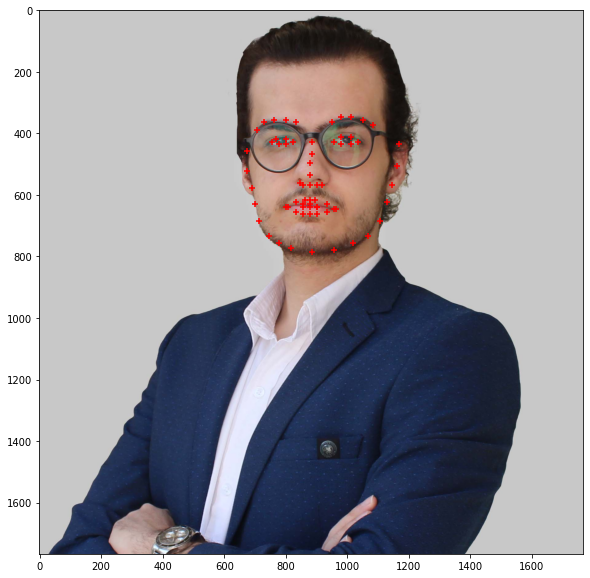

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add data to ax
ax.imshow(cv2.cvtColor(cv2.imread('drive/MyDrive/Soroush.jpg'),
                       cv2.COLOR_BGR2RGB))
ax.scatter(preds[:, 0], preds[:, 1], marker='+', c='r');

# 3D Detection

In [5]:
fa = face_alignment.FaceAlignment(
                                    face_alignment.LandmarksType._3D,
                                    flip_input=False, device='cpu'
                                 )

input = cv2.imread('drive/MyDrive/Soroush.jpg')
preds = fa.get_landmarks(input)[0]

df = pd.DataFrame(preds)
df.columns = ['x','y','z']
fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
fig.show()